In [1]:
#librerias
import numpy as np
#import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import stft, istft
import scipy.signal

sn.set_style('darkgrid')
np.random.seed(27)


## **Perturbation Theory Signal**

In [2]:
# Parameters for the simulation
height = 5*10**-3 #meters 
frequency =  10 #Hz
duration = 10.0 #seconds
num_points =  10000 #number of points in time
time_points = np.linspace(0,duration,num_points)

# 1D Faraday wave 
omega = frequency * 2 * np.pi
#k = omega**2
amplitude = 5 *10**-3 #meters

surface =  height * np.cos(omega*time_points)

for i in range (1,15):
    surface +=  (amplitude/(i+1)) * np.sin((i+1)*omega*time_points)


In [3]:
def faradayWave(height = 5*(10**-3), harmonics = 15):
    time_array = np.linspace(0,duration,num_points)

    #1D Faraday wave
    omega = frequency * 2 * np.pi
    wave = height * np.cos(omega*time_array)

    amplitud = height
    for i in range (1,harmonics):
        buffer = i+1
        wave +=  (amplitud/buffer) * np.sin((i+1)*omega*time_array)

    return wave



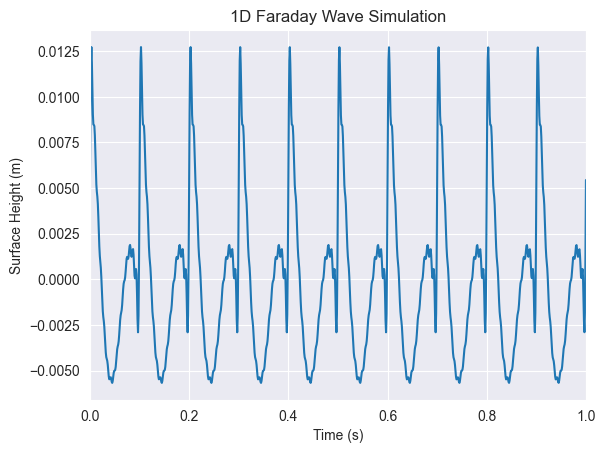

In [4]:
wave = faradayWave(height)

plt.plot(time_points, wave)
plt.xlabel('Time (s)')
plt.ylabel('Surface Height (m)')
plt.title('1D Faraday Wave Simulation')
plt.xlim(0,1)
plt.show()

In [5]:
x = amplitude*np.sin(2*omega*time_points) + amplitude*np.sin(3*omega*time_points)

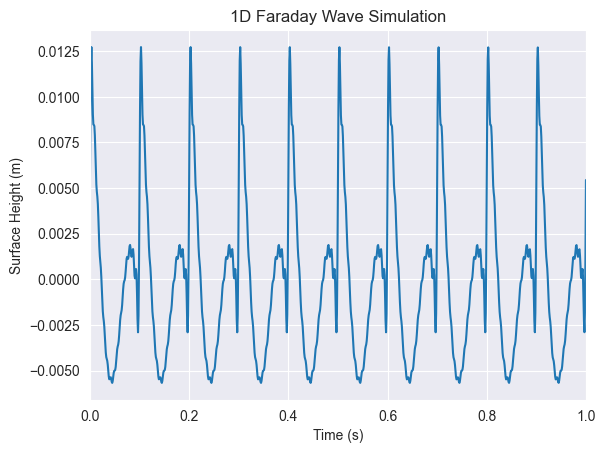

In [6]:
# plot the wave

plt.plot(time_points, surface)
plt.xlabel('Time (s)')
plt.ylabel('Surface Height (m)')
plt.title('1D Faraday Wave Simulation')
plt.xlim(0,1)
plt.show()

### **Noise**

In [7]:
noise = np.random.normal(0,1,time_points.size)/100
rms = math.sqrt(np.mean(surface**2))
rms_noise = math.sqrt(np.mean(noise**2))
snr = 10*np.log(rms**2/rms_noise**2)

In [8]:
print('RMS:\t',rms)
print('RMS Noise:\t',rms_noise)
print('SNR:\t',snr)

RMS:	 0.0044447753590826115
RMS Noise:	 0.00992636530462248
SNR:	 -16.069300989828463


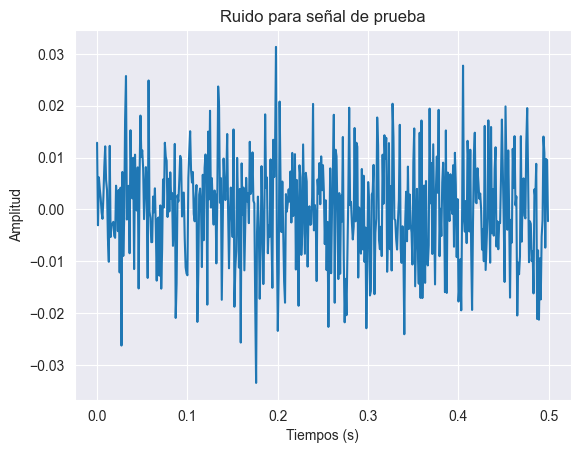

In [9]:
plt.plot(time_points[:500],noise[:500])
plt.xlabel('Tiempos (s)')
plt.ylabel('Amplitud')
plt.title('Ruido para señal de prueba')
plt.show()

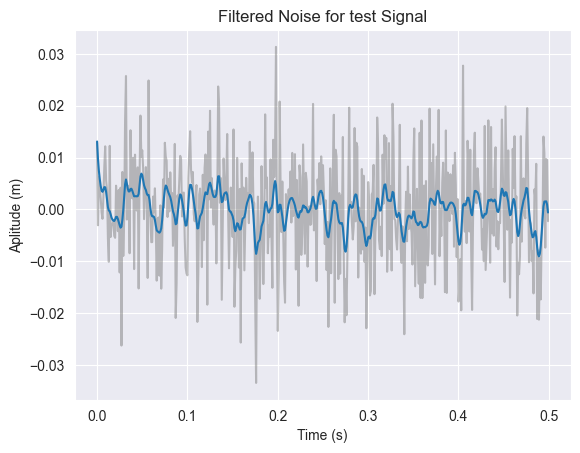

In [10]:
# Filtro pasa bajo

cutoff_freq = 5
order = 1

#b,a = signal.butter(order,cutoff_freq/(0.5*num_points), 'lowpass')
b,a = signal.butter(order, 1/8 , 'lowpass')
filtered =  signal.filtfilt(b,a, noise)

plt.plot(time_points[:500],noise[:500],alpha=0.5,color='grey')
plt.plot(time_points[:500], filtered[:500])
plt.xlabel('Time (s)')
plt.ylabel('Aplitude (m)')
plt.title('Filtered Noise for test Signal')
plt.show()

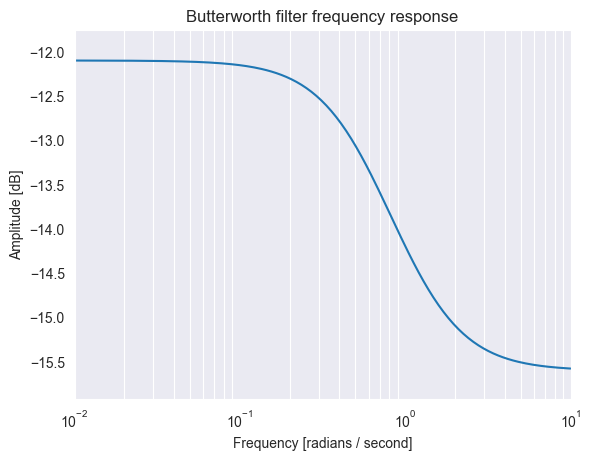

In [11]:
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
#plt.axvline(5, color='green') # cutoff frequency
plt.show()

In [12]:
rms = math.sqrt(np.mean(surface**2))
rms_filtered = math.sqrt(np.mean(filtered**2))
snr_filt = 10*np.log(rms**2/rms_filtered**2)

print('RMS:\t',rms)
print('RMS Noise:\t',rms_filtered)
print('SNR:\t',snr_filt)

RMS:	 0.0044447753590826115
RMS Noise:	 0.0031658432729971776
SNR:	 6.7861974545112425


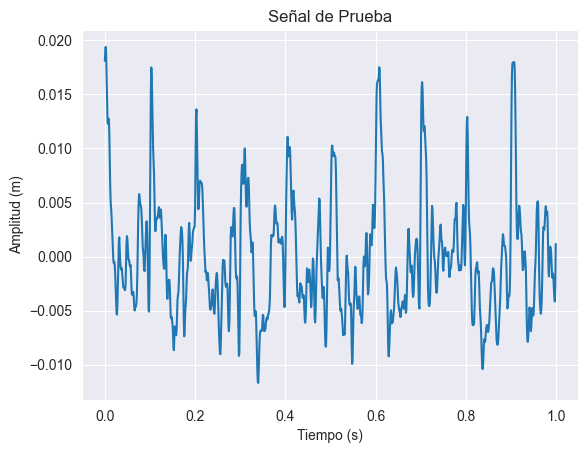

In [13]:
tester =  surface +  filtered

plt.plot(time_points[:1000],tester[:1000])
#plt.plot(time_points,tester)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (m)')
plt.title('Señal de Prueba')
plt.show()

## **PSD**

#### **numpy fft**

In [14]:
# PSD

#test
fft_result =  np.fft.fft(tester)
freqs_test =  np.fft.fftfreq(len(tester), time_points[1]-time_points[0])
psd_test =  np.abs(fft_result)**2

#signal
fft_result =  np.fft.fft(surface)
freqs_signal =  np.fft.fftfreq(len(surface), time_points[1]-time_points[0])
psd_signal =  np.abs(fft_result)**2

#noise
fft_result =  np.fft.fft(filtered)
freqs_noise =  np.fft.fftfreq(len(filtered), time_points[1]-time_points[0])
psd_noise =  np.abs(fft_result)**2



C:\Users\consu\AppData\Local\Temp\ipykernel_17480\1321835742.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1000)


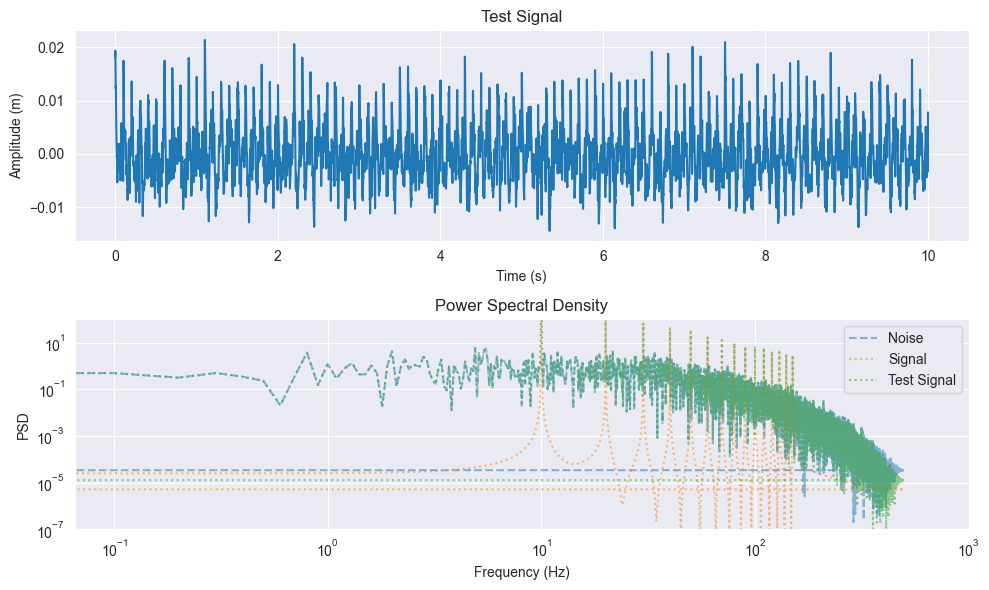

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(time_points,tester)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.title('Test Signal')

plt.subplot(2,1,2)
plt.loglog(freqs_noise, psd_noise,label='Noise', alpha = 0.5, linestyle='--')
plt.loglog(freqs_signal, psd_signal,label='Signal', alpha = 0.5, linestyle = ':')
plt.loglog(freqs_test, psd_test,label='Test Signal', alpha = 0.5, linestyle = 'dotted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Power Spectral Density')
plt.legend()
plt.xlim(0,1000)
plt.ylim(10**-7, 10**2 )

plt.tight_layout()
plt.show()

#### **scipy fft**

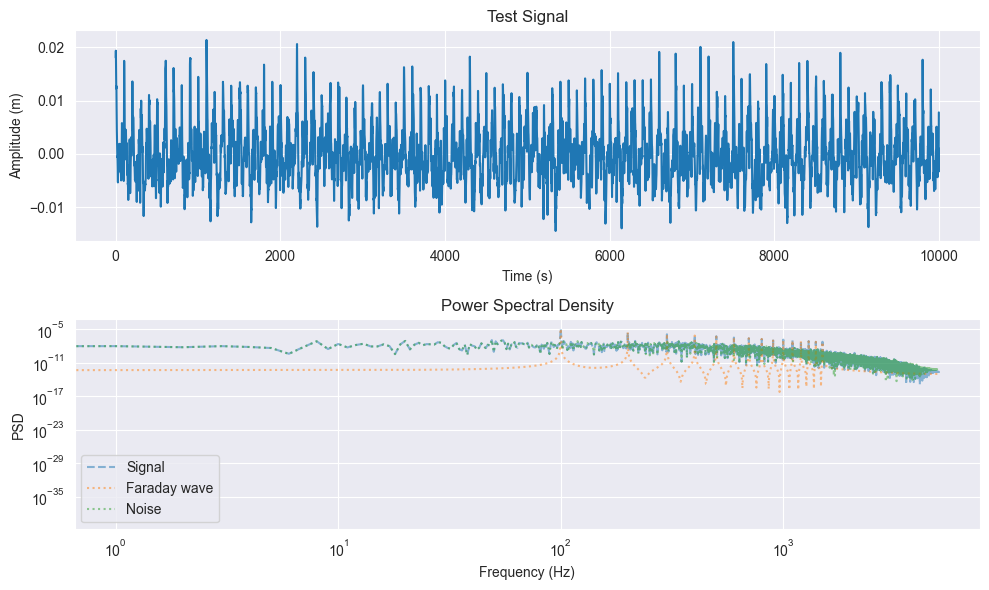

In [16]:
fs = 10000

(f_signal, S_signal) = scipy.signal.periodogram(tester, 10000, scaling='density')
(f_faraday, S_faraday) = scipy.signal.periodogram(surface, 10000, scaling='density')
(f_noise, S_noise) = scipy.signal.periodogram(filtered, 10000, scaling='density')


plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(tester)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.title('Test Signal')

plt.subplot(2,1,2)
plt.loglog(f_signal, S_signal, label='Signal', alpha = 0.5, linestyle='--')
plt.loglog(f_faraday, S_faraday, label='Faraday wave', alpha = 0.5, linestyle = ':')
plt.loglog(f_noise, S_noise,label='Noise', alpha = 0.5, linestyle = 'dotted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Power Spectral Density')
plt.legend()
#plt.xlim(0,1000)
#plt.ylim(10**-7, 10**2 )

plt.tight_layout()
plt.show()

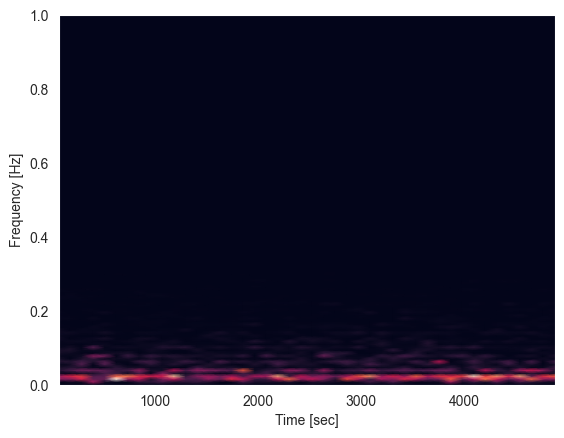

In [22]:
f, t, Sxx = signal.spectrogram(tester, 2)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()